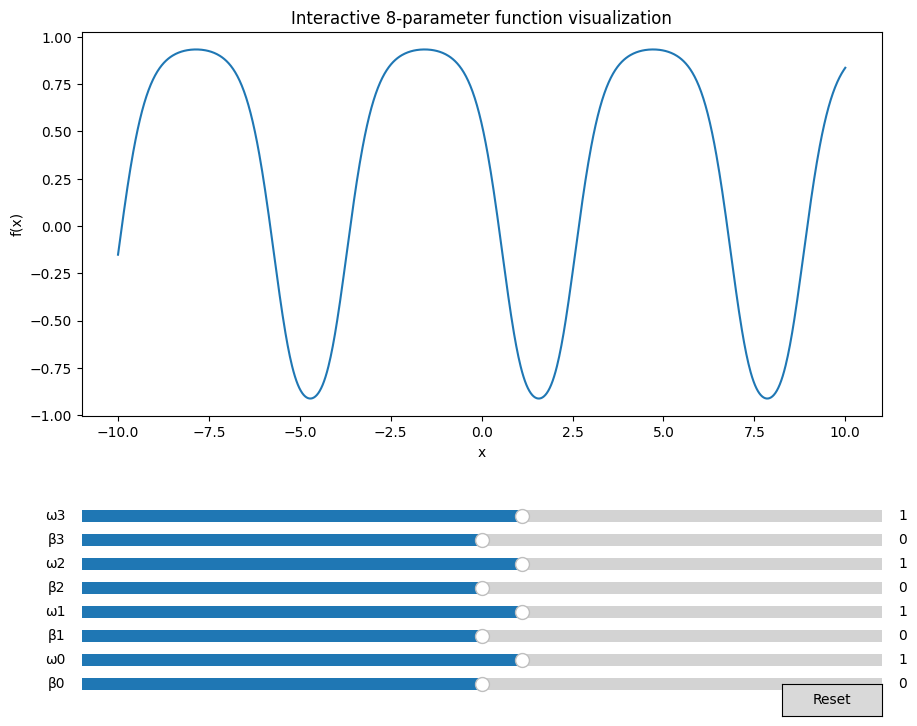

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

def f(x, beta0, omega0, beta1, omega1, beta2, omega2, beta3, omega3):
    return beta3 + omega3 * np.cos(beta2 + omega2 * np.exp(beta1 + omega1 * np.sin(beta0 + omega0 * x)))

# Initial parameter values
initial_params = [0, 1, 0, 1, 0, 1, 0, 1]

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots(figsize=(10, 8))
x = np.linspace(-10, 10, 1000)
line, = ax.plot(x, f(x, *initial_params))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Interactive 8-parameter function visualization')

# Adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.1, bottom=0.4)

# Make a horizontal slider to control each parameter
slider_axes = [plt.axes([0.1, 0.05 + i*0.03, 0.8, 0.03]) for i in range(8)]
sliders = [Slider(ax, f'{param}', -10.0, 10.0, valinit=val) for ax, param, val in zip(slider_axes, ['β0', 'ω0', 'β1', 'ω1', 'β2', 'ω2', 'β3', 'ω3'], initial_params)]

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(x, *(s.val for s in sliders)))
    fig.canvas.draw_idle()

# Register the update function with each slider
for slider in sliders:
    slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    for slider, initial_val in zip(sliders, initial_params):
        slider.reset()

button.on_clicked(reset)

plt.show()